In [1]:
#include <iostream>
#include <string>
#include <stdio.h> 

In [2]:
TFile *file = TFile::Open("../Tracks_Clusters.root");
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print();

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

# Exercise 6

In [3]:
float evtw = -1;

vector<float> *track_R4_pt;
vector<float> *track_R4_eta;
vector<float> *track_R4_phi;
vector<float> *track_R4_m;

vector<float> *truth_R4_pt;
vector<float> *truth_R4_eta;
vector<float> *truth_R4_phi;
vector<float> *truth_R4_m;

vector<float> *reco_R4_jvf;

tree->SetBranchAddress("EventWeight", &evtw);
tree->SetBranchAddress("TrackJets_R4_pt", &track_R4_pt);
tree->SetBranchAddress("TrackJets_R4_eta", &track_R4_eta);
tree->SetBranchAddress("TrackJets_R4_phi", &track_R4_phi);
tree->SetBranchAddress("TrackJets_R4_m", &track_R4_m);

tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);
tree->SetBranchAddress("TruthJets_R4_eta", &truth_R4_eta);
tree->SetBranchAddress("TruthJets_R4_phi", &truth_R4_phi);
tree->SetBranchAddress("TruthJets_R4_m", &truth_R4_m);
tree->SetBranchAddress("RecoJets_R4_jvf", &reco_R4_jvf);

TH1F *hist_DR_track_truth = new TH1F("Delta R track","Delta R; #Delta R; Events",20,0,2);

TCanvas *canvas = new TCanvas("Canvas","",800,600);

In [4]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(track_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
    TLorentzVector trackJet;
    trackJet.SetPtEtaPhiM(track_R4_pt->at(0),track_R4_eta->at(0),track_R4_phi->at(0),track_R4_m->at(0));        
            
        //Plot the Delta R
        hist_DR_track_truth->Fill(truthJet.DeltaR(trackJet),evtw);
    }
    }
}

std::cout << "Done!" << std::endl;

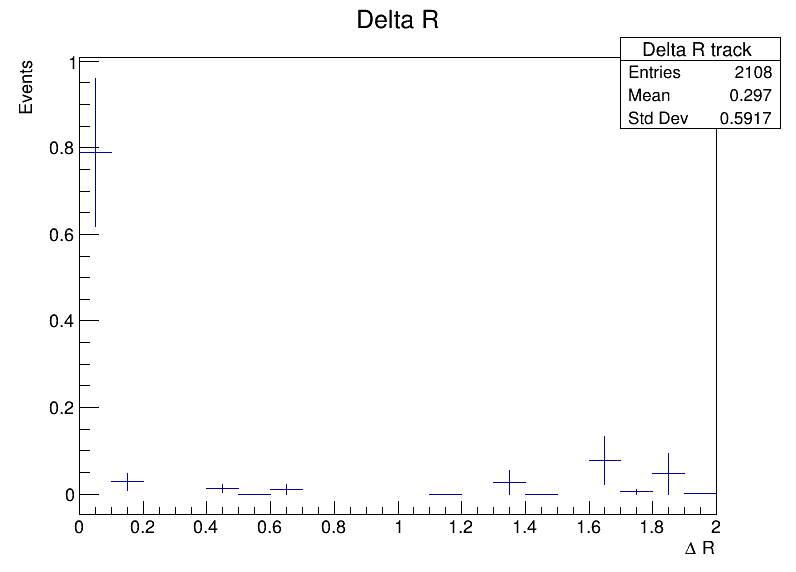

In [5]:
hist_DR_track_truth->Scale(1/hist_DR_track_truth->Integral());
hist_DR_track_truth->DrawNormalized("");
canvas->Draw();

In [6]:
vector<float> *reco_R4_pt;
vector<float> *reco_R4_eta;
vector<float> *reco_R4_phi;
vector<float> *reco_R4_m;

tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
tree->SetBranchAddress("RecoJets_R4_eta", &reco_R4_eta);
tree->SetBranchAddress("RecoJets_R4_phi", &reco_R4_phi);
tree->SetBranchAddress("RecoJets_R4_m", &reco_R4_m);

TH1F *hist_DR_reco_truth = new TH1F("Delta R reco","Delta R; #Delta R; Events",20,0,2);
TH1F *hist_DR_reco_jvf_truth = new TH1F("Delta R reco-jvf","Delta R; #Delta R; Events",20,0,2);

TCanvas *canvas = new TCanvas("Canvas","",800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [7]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0)); 
    if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
            
        //Plot the Delta R
        hist_DR_reco_truth->Fill(truthJet.DeltaR(recoJet),evtw);
    }
    
    if(reco_R4_pt->size()!=0){
    TLorentzVector recojvfJet;
    recojvfJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
            
        //Plot the Delta R
        hist_DR_reco_jvf_truth->Fill(truthJet.DeltaR(recojvfJet),evtw);
    }
    }
}

std::cout << "Done!" << std::endl;

Done!


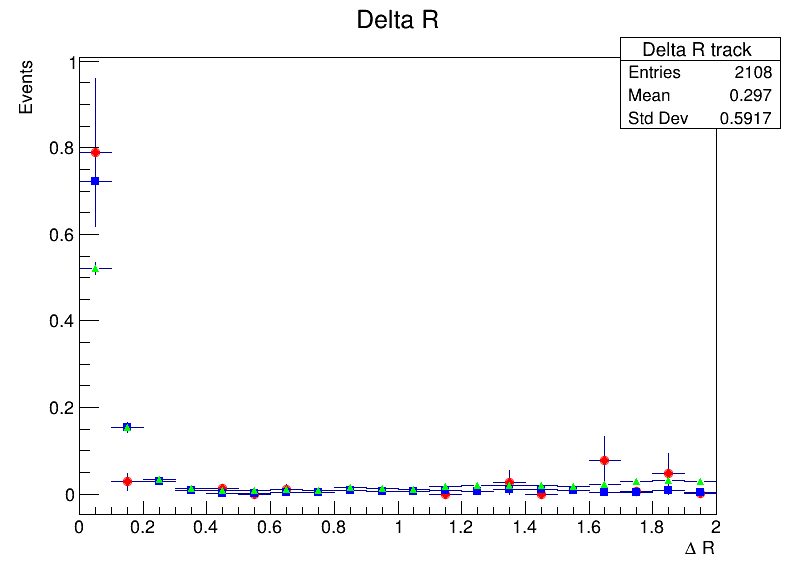

In [8]:
hist_DR_track_truth->SetMarkerStyle(20);
hist_DR_track_truth->SetMarkerColor(kRed);
hist_DR_track_truth->Scale(1/hist_DR_track_truth->Integral());
hist_DR_track_truth->DrawNormalized("");
hist_DR_reco_truth->SetMarkerStyle(21);
hist_DR_reco_truth->SetMarkerColor(kBlue);
hist_DR_reco_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_DR_reco_truth->DrawNormalized("same");
hist_DR_reco_jvf_truth->SetMarkerStyle(22);
hist_DR_reco_jvf_truth->SetMarkerColor(kGreen);
hist_DR_reco_jvf_truth->Scale(1/hist_DR_reco_jvf_truth->Integral());
hist_DR_reco_jvf_truth->DrawNormalized("same");
canvas->Draw();

# Excercise 7

In [9]:
TH1F *hist_DR_recotruth_pt_20GeV = new TH1F("pT response","Reco Responce pT; Delta R; Events",40,0,3);
TH1F *hist_DR_recotruth_pt_100GeV = new TH1F("pT response","Reco Responce pT; Delta R; Events",40,0,3);
TH1F *hist_DR_recotruth_pt_500GeV = new TH1F("pT response","Reco Responce pT; Delta R; Events",40,0,3);
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Warning in <TFile::Append>: Replacing existing TH1: pT response (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pT response (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [10]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0)); 
        if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
            TLorentzVector recoJet;
            recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
            if(truthJet.DeltaR(recoJet) < 0.3){
                    hist_DR_recotruth_pt_20GeV->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);
            }
        }
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>100000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0)); 
        if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
            TLorentzVector recoJet;
            recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
            if(truthJet.DeltaR(recoJet) < 0.3){
                    hist_DR_recotruth_pt_100GeV->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);
            }
        }
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>500000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0)); 
        if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
            TLorentzVector recoJet;
            recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
            if(truthJet.DeltaR(recoJet) < 0.3){
                    hist_DR_recotruth_pt_500GeV->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);
            }
        }
    }
}

std::cout << "Done!" << std::endl;

Done!


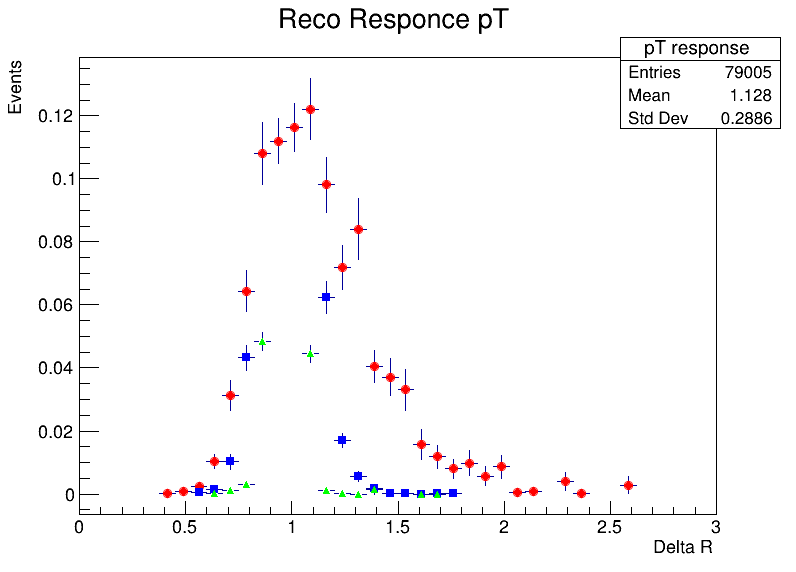

In [11]:
hist_DR_recotruth_pt_20GeV->SetMarkerStyle(20);
hist_DR_recotruth_pt_20GeV->SetMarkerColor(kRed);
hist_DR_recotruth_pt_20GeV->Scale(1/hist_DR_recotruth_pt_20GeV->Integral());
hist_DR_recotruth_pt_20GeV->DrawNormalized("");
hist_DR_recotruth_pt_100GeV->SetMarkerStyle(21);
hist_DR_recotruth_pt_100GeV->SetMarkerColor(kBlue);
hist_DR_recotruth_pt_100GeV->Scale(1/hist_DR_recotruth_pt_100GeV->Integral());
hist_DR_recotruth_pt_100GeV->DrawNormalized("same");
hist_DR_recotruth_pt_500GeV->SetMarkerStyle(22);
hist_DR_recotruth_pt_500GeV->SetMarkerColor(kGreen);
hist_DR_recotruth_pt_500GeV->Scale(1/hist_DR_recotruth_pt_500GeV->Integral());
hist_DR_recotruth_pt_500GeV->DrawNormalized("same");
canvas->Draw();

In [12]:
TH1F *hist_DR_tracktruth_pt_20GeV = new TH1F("pT response","Track Responce pT; Delta R; Events",40,0,3);
TH1F *hist_DR_tracktruth_pt_100GeV = new TH1F("pT response","Track Responce pT; Delta R; Events",40,0,3);
TH1F *hist_DR_tracktruth_pt_500GeV = new TH1F("pT response","Track Responce pT; Delta R; Events",40,0,3);
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Warning in <TFile::Append>: Replacing existing TH1: pT response (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pT response (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pT response (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [13]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0)); 
        if(track_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
            TLorentzVector trackJet;
            trackJet.SetPtEtaPhiM(track_R4_pt->at(0),track_R4_eta->at(0),track_R4_phi->at(0),track_R4_m->at(0));        
            if(truthJet.DeltaR(trackJet) < 0.3){
                    hist_DR_tracktruth_pt_20GeV->Fill(track_R4_pt->at(0)/truth_R4_pt->at(0),evtw);
            }
        }
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>100000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0)); 
        if(track_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
            TLorentzVector trackJet;
            trackJet.SetPtEtaPhiM(track_R4_pt->at(0),track_R4_eta->at(0),track_R4_phi->at(0),track_R4_m->at(0));        
            if(truthJet.DeltaR(trackJet) < 0.3){
                    hist_DR_tracktruth_pt_100GeV->Fill(track_R4_pt->at(0)/truth_R4_pt->at(0),evtw);
            }
        }
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>500000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0)); 
        if(track_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
            TLorentzVector trackJet;
            trackJet.SetPtEtaPhiM(track_R4_pt->at(0),track_R4_eta->at(0),track_R4_phi->at(0),track_R4_m->at(0));        
            if(truthJet.DeltaR(trackJet) < 0.3){
                    hist_DR_tracktruth_pt_500GeV->Fill(track_R4_pt->at(0)/truth_R4_pt->at(0),evtw);
            }
        }
    }
}

std::cout << "Done!" << std::endl;

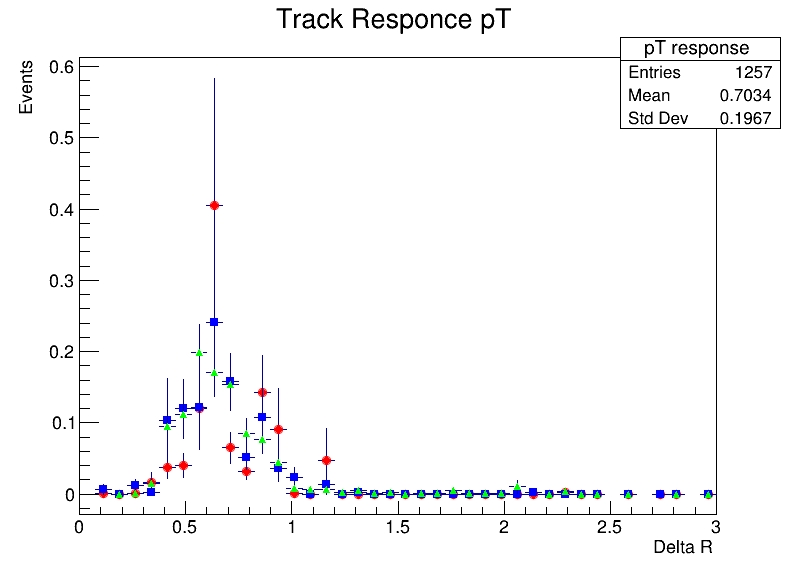

In [14]:
hist_DR_tracktruth_pt_20GeV->SetMarkerStyle(20);
hist_DR_tracktruth_pt_20GeV->SetMarkerColor(kRed);
hist_DR_tracktruth_pt_20GeV->Scale(1/hist_DR_recotruth_pt_20GeV->Integral());
hist_DR_tracktruth_pt_20GeV->DrawNormalized();
hist_DR_tracktruth_pt_100GeV->SetMarkerStyle(21);
hist_DR_tracktruth_pt_100GeV->SetMarkerColor(kBlue);
hist_DR_tracktruth_pt_100GeV->Scale(1/hist_DR_recotruth_pt_100GeV->Integral());
hist_DR_tracktruth_pt_100GeV->DrawNormalized("same");
hist_DR_tracktruth_pt_500GeV->SetMarkerStyle(22);
hist_DR_tracktruth_pt_500GeV->SetMarkerColor(kGreen);
hist_DR_tracktruth_pt_500GeV->Scale(1/hist_DR_recotruth_pt_500GeV->Integral());
hist_DR_tracktruth_pt_500GeV->DrawNormalized("same");
canvas->Draw();